In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
import json


In [26]:


#df_covid_current_states=pd.read_csv('https://covidtracking.com/api/v1/states/current.csv')
#df_covid_current_states_updated=df_covid_current_states[['state','positive',]]
#print(df_covid_current_states.head())
#df_state_geo = pd.read_csv('https://raw.githubusercontent.com/kelvins/US-Cities-Database/master/csv/us_cities.csv')
#print(df_state_geo.head())
data_json=requests.get(url = 'https://www.trackcorona.live/api/cities').json()
df_states = pd.read_json(json.dumps(data_json['data']))
print(df_states)
#df_states_needed = df_states[['latitude','longitude','confirmed','dead', 'recovered']]
df_states_needed = df_states[['latitude','longitude','confirmed']]
#df_covid_current_states = pd.read_json(d)
df_states_needed.head()

                        location country_code   latitude   longitude  \
0                         Anshun           cn  26.253088  105.947595   
1         Wibaux County, Montana           us  46.783665 -104.318390   
2                    Pilõezinhos           br  -6.843131  -35.530578   
3                        Pavussu           br  -7.964325  -43.224345   
4           Waller County, Texas           us  29.975163  -96.025574   
...                          ...          ...        ...         ...   
9890      Lincoln County, Kansas           us  39.113579  -98.221298   
9891   Jones County, Mississippi           us  31.534324  -89.170600   
9892         Rush County, Kansas           us  38.535897  -99.278558   
9893      Cherokee County, Texas           us  31.798183  -95.143207   
9894  Palm Beach County, Florida           us  26.651450  -80.276733   

      confirmed   dead  recovered  velocity_confirmed  velocity_dead  \
0             4    0.0        4.0                   0          

,latitude,longitude,confirmed
0,26.253088,105.947595,4
1,46.783665,-104.318390,1
2,-6.843131,-35.530578,87
3,-7.964325,-43.224345,2
4,29.975163,-96.025574,377


In [10]:
from sklearn.model_selection import train_test_split
X=df_states_needed[['latitude','longitude']]
y=df_states_needed['confirmed']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7916, 2)
(1979, 2)


The covid confirmed today near to my home address is  [3650.88888889]
r2  -0.4295370046305744  - 1
-0.4295370046305744 - 1
The MSE is: 61638507.605861545   1
r2  -0.037866817677078  - 2
-0.037866817677078 - 2
The MSE is: 44750546.17546741   2
r2  0.07605376532663799  - 3
0.07605376532663799 - 3
The MSE is: 39838539.9110662   3
r2  0.12453192011237169  - 4
0.12453192011237169 - 4
The MSE is: 37748267.953922436   4
r2  0.08326076368066004  - 5
0.08326076368066004 - 5
The MSE is: 39527789.911995955   5
r2  0.09061065656265532  - 6
0.09061065656265532 - 6
The MSE is: 39210878.61355342   6
r2  0.11966643069230398  - 7
0.11966643069230398 - 7
The MSE is: 37958057.21132091   7
r2  0.146063240776368  - 8
0.146063240776368 - 8
The MSE is: 36819884.52053594   8
r2  0.16282238699085627  - 9
0.16282238699085627 - 9
The MSE is: 36097266.80720404   9
r2  0.17022433438695506  - 10
0.17022433438695506 - 10
The MSE is: 35778111.032016166   10
r2  0.17283440618721047  - 11
0.17283440618721047 - 11
The M

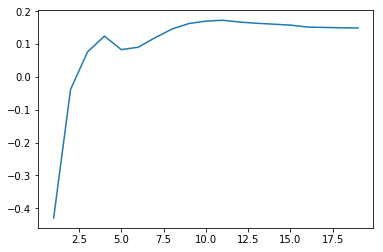

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
knnr = KNeighborsRegressor(n_neighbors = 9)
knnr.fit(X_train, y_train)
a=[]
b=[]
print("The covid confirmed today near to my home address is " , knnr.predict([[35.34,-80.62]]))
for n_value in  range(1,20):
    knnr = KNeighborsRegressor(n_neighbors = n_value)
    knnr.fit(X_train, y_train)
    a.append(n_value)
    b.append(sklearn.metrics.r2_score(y_test,knnr.predict(X_test)))
    #plt.scatter(x=n_value,y=format(np.power(y_test-knnr.predict(X_test),2).mean()),s=60,c='red')
    print("r2 ", sklearn.metrics.r2_score(y_test,knnr.predict(X_test))," -",n_value)
    print(knnr.score(X_test,y_test), "-", n_value)
    

    print ("The MSE is:",mean_squared_error(y_test,knnr.predict(X_test))," ",n_value)
plt.plot(a,b)
plt.show()

In [24]:
addressSearch = "murphy 28906"

from sklearn.neighbors import KNeighborsRegressor
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="addresscodingLatLong")
location = geolocator.geocode(addressSearch)
knnr = KNeighborsRegressor(n_neighbors = 9)
knnr.fit(X_train, y_train)
print(location.latitude,location.longitude)
print("Actual covid confirmed index based on your location is - ", knnr.predict([[location.latitude,location.longitude]]))

35.0875836 -84.0346315
Actual covid confirmed index based on your location is -  [160.55555556]
